In [10]:
import os
base_dir = 'C:\Users\Ben\Documents\GitHub\expression_broad_data'
os.chdir(base_dir) 
from core import expression_plots 
from core import io_library 
# from IPython.core.debugger import Tracer
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import csv
import scipy.cluster.hierarchy as sch
from collections import Counter
import math
import plotly.plotly as py
py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
import cufflinks as cf
from matplotlib.colors import LogNorm
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

#from sklearn.cluster import AgglomerativeClustering


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#This file should be main one for comparing SC and KL PKA inhibition directly to one another. 

In [3]:
#Load NMPP1 Data for KL
kl_nmpp1_lfc = pd.read_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\LFC_KLac_ASmin_ASplus.pkl")


In [4]:
#Load NMPP1 Data for SC

sc_nmpp1_solis = io_library.load_solis_NMPP1_data('WT')

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\lib\nanfunctions.py:675: RuntimeWarning:

Mean of empty slice



In [26]:
#Load KL to SC ortholog mapping

kl_orthologs = pd.read_pickle(base_dir + "\expression_data\ortholog_files_YGOB\kl_orthologs.pkl")


In [29]:
#Map KL PKA inhibition data onto related SC orthologs
#First change column name for kl_nmpp1_lfc data to match ortholog table for merge. 
kl_nmpp1_lfc_renamed = kl_nmpp1_lfc.copy()
kl_nmpp1_lfc_renamed.columns = ['kl_genename'] + list(kl_nmpp1_lfc.columns[1:])
kl_PKA_data_sc_orthologs = pd.merge(kl_orthologs, kl_nmpp1_lfc_renamed, on = 'kl_genename', how = 'inner')

In [37]:
#Merge SC and KL Data
#KL data is from DEseq2, and NMPP1 is from averaged O'shea Microarrays. 
#kl_sc_PKA_data = pd.merge(kl_PKA_data_sc_orthologs,mace_SC_PKA_data, on = 'sc_genename', how = 'inner')
kl_sc_PKA_data = kl_PKA_data_sc_orthologs.join(sc_nmpp1_solis, on = 'sc_genename')

#would be good to output here how many genes don't merge (missing orthologs in either direction)
#Much of this is to be done in kl_sc_orthologs_pblast

In [38]:
#save kl_sc_PKA_data
kl_sc_PKA_data.to_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\kl_sc_PKA_data")

In [2]:
#load kl_sc_PKA_data
kl_sc_PKA_data = pd.read_pickle(base_dir + "\expression_data\kl_PKA_as_20160824\kl_sc_PKA_data")

In [6]:
#Lookup by SC common name
#jso_msn2_targets = ['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3', 'PGM2']
common_name_query = ['RME1']  #['SSA1', 'SSA2','AHA1','BTN2', 'CPR6','CUR1','FES1','HCH1','HSC82','HSP42','HSP104','HSP78','HSP82','MBF1','MDJ1','SIS1','STI1','YDJ1']
kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(common_name_query)].sort_values(by='KL_PKA(AS)+1NMPP1')


,N SCer Orthologs,kl_genename,sc_genename,KL_PKA(AS)+1NMPP1,padj,SC_PKA(AS)+1NMPP1,SC_common_name
792,1,KLLA0A02629g,YGR044C,1.253893,1.500586e-133,1.67469,RME1


In [10]:
#Lookup by SC common name
jso_msn2_targets = ['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3', 'PGM2']
common_name_query = ['SSA1', 'SSA2','AHA1','BTN2', 'CPR6','CUR1','FES1','HCH1','HSC82','HSP42','HSP104','HSP78','HSP82','MBF1','MDJ1','SIS1','STI1','YDJ1']
kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(common_name_query)].sort_values(by='KL_PKA(AS)+1NMPP1')


,N SCer Orthologs,kl_genename,sc_genename,KL_PKA(AS)+1NMPP1,padj,SC_PKA(AS)+1NMPP1,SC_common_name
3850,1,KLLA0D04224g,YLL024C,-3.827877,0.000000e+00,-2.268460,SSA2
564,1,KLLA0F03333g,YNL064C,-2.271297,2.052095e-220,-2.047930,YDJ1
1171,1,KLLA0C12221g,YNL281W,-1.102161,8.344354e-52,-0.768895,HCH1
4435,2,KLLA0D12958g,YPL240C,-0.671964,1.908416e-34,1.267320,HSP82
4434,2,KLLA0D12958g,YMR186W,-0.671964,1.908416e-34,-0.462858,HSC82
633,1,KLLA0D07656g,YFL016C,-0.340166,5.580102e-05,0.900274,MDJ1
3169,1,KLLA0F25014g,YOR298C-A,-0.161868,4.969806e-03,0.819461,MBF1
723,1,KLLA0D04818g,YNL007C,0.107579,1.774874e-01,0.682115,SIS1
3331,1,KLLA0A07062g,YOR027W,0.190130,1.057140e-03,0.807994,STI1
1086,1,KLLA0E11375g,YBR101C,0.248760,2.182012e-04,-0.880298,FES1


In [41]:
#Highlight hits that are statistically significant for K.Lactis 

#Add column which highlights only pvalues below a threshold
pthreshold = 10e-25

kl_sc_PKA_data_sig = kl_sc_PKA_data[kl_sc_PKA_data['padj'] < pthreshold]
kl_sc_PKA_data_unsig = kl_sc_PKA_data[kl_sc_PKA_data['padj'] > pthreshold]

fig = {
    'data': [
  		{
  			'x': kl_sc_PKA_data_sig['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_sig['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_sig['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'kl padj < ' + str(pthreshold)},
        {
        	'x': kl_sc_PKA_data_unsig['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_unsig['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_unsig['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'kl padj > ' + str(pthreshold)}
    ],
    'layout': {
        'xaxis': {'title': 'KL LFC 4uM NMPP1'},
        'yaxis': {'title': "SC Fold Change"}
    }
}

# IPython notebook
# py.iplot(fig, filename='pandas/multiple-scatter')

url = py.plot(fig, filename='sc_kl_scatter_sig_highlight_solis')




From Stewart-Ornstein et al 2013  http://www.sciencedirect.com/science/article/pii/S0960982213011901 there were 32 MSN2 target promoters that had "measureable basal expression and greater than 4-fold induction in one of the perturbations and lost at least 50% of this induction in a Δmsn2/4 background".  This is out of 40 that were identified from Gasch et al 2000, Huebert et al 2014, and Capaldi et al 2008. Those genes were: 

['SSA1', 'SSA4', 'HSP104', 'CTT1', 'TPK1', 'TFS1', 'DDR2', 'TSA1', 'HSP12', 'TMA10', 'TPS2', 'RTC3', 'GPH1', 'HXK1', 'TSA2', 'CYC7', 'PNC1', 'GSY1', 'FMP48', 'SS13', 'ALD4', 'YNR014W', 'HOR2', 'YOR173W', 'RAS2', 'GLK1', 'GPD1', 'HSP26', 'SIP18', 'TKL2', 'FMP16', 'ALD3']



In [42]:
#Highlight jso msn2 targets on scatter plot MSN2 Hits for K.Lactis 

kl_sc_PKA_data_msn2 = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]
kl_sc_PKA_data_notmsn2 = kl_sc_PKA_data[~kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]

fig = {
    'data': [
  		{
        	'x': kl_sc_PKA_data_notmsn2['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_notmsn2['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_notmsn2['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'rest of genes'},
  		{
  			'x': kl_sc_PKA_data_msn2['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_msn2['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_msn2['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'JSO Msn2 Targets'}
            ],
    'layout': {
        'xaxis': {'title': 'KL LFC 4uM NMPP1'},
        'yaxis': {'title': "SC averaged Fold Change"}
    }
}

# IPython notebook
# py.iplot(fig, filename='pandas/multiple-scatter')

url = py.plot(fig, filename='sc_kl_scatter_jso_msn2_solis')



In [44]:
#Highlight STRE presence in KL equal to or greater than one
#Lookup by kl_genename common name
jso_prom_hits_kl_orthologs = pd.read_table(base_dir + "\expression_data\kl_PKA_as_20160824\\fimo_MSN2_KL_jso_targets.txt")
jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
jso_prom_hits_kl_hitcount = Counter(jso_prom_hits_kl_orthologs_exact['sequence name'])# counts the elements' frequency

stre_eq1 = [kl_gene for kl_gene, n in jso_prom_hits_kl_hitcount.items() if n==1]
stre_gt1 = [kl_gene for kl_gene, n in jso_prom_hits_kl_hitcount.items() if n>1]

kl_sc_PKA_data_msn2 = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]
kl_sc_PKA_data_msn2_stre_eq1 = kl_sc_PKA_data_msn2[kl_sc_PKA_data_msn2['kl_genename'].isin(stre_eq1)]
kl_sc_PKA_data_msn2_stre_gt1 = kl_sc_PKA_data_msn2[kl_sc_PKA_data_msn2['kl_genename'].isin(stre_gt1)]
kl_sc_PKA_data_msn2_stre_no = kl_sc_PKA_data_msn2[~kl_sc_PKA_data_msn2['kl_genename'].isin(stre_eq1+stre_gt1)]
kl_sc_PKA_data_notmsn2 = kl_sc_PKA_data[~kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]

fig = {
    'data': [
  		{
        	'x': kl_sc_PKA_data_notmsn2['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_notmsn2['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_notmsn2['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'rest of genes'},
		{
        	'x': kl_sc_PKA_data_msn2_stre_no['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_msn2_stre_no['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_msn2_stre_no['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'JSO Msn2 Targets no stre'},
		{
        	'x': kl_sc_PKA_data_msn2_stre_eq1['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_msn2_stre_eq1['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_msn2_stre_eq1['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'JSO Msn2 Targets 1 stre'},
  		{
  			'x': kl_sc_PKA_data_msn2_stre_gt1['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_msn2_stre_gt1['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_msn2_stre_gt1['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'JSO Msn2 Targets >1 stre'}
            ],
    'layout': {
        'xaxis': {'title': 'KL LFC 4uM NMPP1'},
        'yaxis': {'title': "SC averaged Fold Change"}
    }
}

# IPython notebook
# py.iplot(fig, filename='pandas/multiple-scatter')

url = py.plot(fig, filename='sc_kl_scatter_jso_msn2_stre_solis')


In [45]:
#Plot SC "ESR activated" and "ESR repressed" genes onto SC/VS KL plot
# #For activation and repression
ESR_types = ['activated','repressed']
ESR_genes = {}
for ESR_type in ESR_types:
     ESR_genes[ESR_type] = io_library.get_gasch_ESR_list(ESR_type)

#241 activated genes
#539 repressed genes
#4196 remaining genes
kl_sc_PKA_data_ESR_activated = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(ESR_genes['activated'])]
kl_sc_PKA_data_ESR_repressed = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(ESR_genes['repressed'])]
kl_sc_PKA_data_notESR = kl_sc_PKA_data[~kl_sc_PKA_data['sc_genename'].isin(ESR_genes['repressed']+ESR_genes['activated'])]

fig = {
    'data': [
  		{
        	'x': kl_sc_PKA_data_notESR['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_notESR['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_notESR['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'non-ESR genes'},
  		{
        	'x': kl_sc_PKA_data_ESR_activated['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_ESR_activated['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_ESR_activated['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'ESR Activated genes'},
  		{
  			'x': kl_sc_PKA_data_ESR_repressed['KL_PKA(AS)+1NMPP1'], 
        	'y': kl_sc_PKA_data_ESR_repressed['SC_PKA(AS)+1NMPP1'], 
        	'text': kl_sc_PKA_data_ESR_repressed['SC_common_name'], 
        	'mode': 'markers', 
        	'name': 'ESR Repressed genes'}
            ],
    'layout': {
        'xaxis': {'title': 'KL LFC 4uM NMPP1'},
        'yaxis': {'title': "SC averaged Fold Change"}
    }
}

url = py.plot(fig, filename='ESR Activated and Repressed genes from Gasch Data - solis data')



In [3]:
#Make dataframe for use in R to plot numbers of STRE sites. 
#Load Fimo for KL
Msn2_hits_KL = pd.read_table(base_dir + "\expression_data\kl_PKA_as_20160824\\fimo_20170224_Msn2_KL_all.txt")
# filter step - could do it by Pvalue or exact motif 
#jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
Msn2_hits_KL_hitcount = Counter(Msn2_hits_KL['sequence name'])# counts the elements' frequency
Msn2_hits_KL_unique = Msn2_hits_KL_hitcount.keys()

#Msn2_hits_KL_gt1 = [kl_gene for kl_gene, n in Msn2_hits_KL_hitcount.items() if n>1]

#Load Fimo for SC
Msn2_hits_SC = pd.read_table(base_dir + "\expression_data\kl_PKA_as_20160824\\fimo_20170224_Msn2_SC_all.txt")
# filter step - could do it by Pvalue or exact motif 
#jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
Msn2_hits_SC_hitcount = Counter(Msn2_hits_SC['sequence name'])# counts the elements' frequency
Msn2_hits_SC_unique = Msn2_hits_SC_hitcount.keys()

#Msn2_hits_SC_gt1 = [sc_gene for sc_gene, n in Msn2_hits_SC_hitcount.items() if n>1]




In [18]:
kl_sc_PKA_data_msn2 = kl_sc_PKA_data[kl_sc_PKA_data['SC_common_name'].isin(jso_msn2_targets)]
kl_sc_PKA_data_msn2['SC_STREs'] = [Msn2_hits_SC_hitcount[gene] for gene in kl_sc_PKA_data_msn2['sc_genename']]
kl_sc_PKA_data_msn2['KL_STREs'] = [Msn2_hits_KL_hitcount[gene] for gene in kl_sc_PKA_data_msn2['kl_genename']]
kl_sc_PKA_data_msn2.to_csv(base_dir + "\expression_data\kl_PKA_as_20160824\msn2_hits_STREs.csv")



C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Ben\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



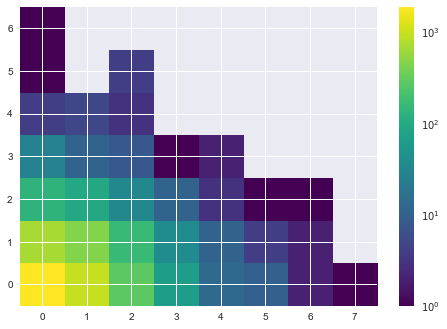

In [17]:
#Highlight Msn2 hits for SC, KL and both
kl_sc_PKA_data_Msn2_hits = kl_sc_PKA_data

#Load Fimo for KL
Msn2_hits_KL = pd.read_table(base_dir + "\expression_data\kl_PKA_as_20160824\\fimo_20170224_Msn2_KL_all.txt")
# # filter step - could do it by Pvalue or exact motif 
# # This dataset (STRE) only has exact matches so no need to filter. 

# #jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
Msn2_hits_KL_hitcount = Counter(Msn2_hits_KL['sequence name'])# counts the elements' frequency

Msn2_hits_KL_list = [Msn2_hits_KL_hitcount[kl_gene] for kl_gene in kl_sc_PKA_data_Msn2_hits['kl_genename']]
kl_sc_PKA_data_Msn2_hits['kl_Msn2_hits'] = Msn2_hits_KL_list
kl_sc_PKA_data_Msn2_hits

#Load Fimo for SC
Msn2_hits_SC = pd.read_table(base_dir + "\expression_data\kl_PKA_as_20160824\\fimo_20170224_Msn2_SC_all.txt")
# # filter step - could do it by Pvalue or exact motif 
# # This dataset (STRE) only has exact matches so no need to filter
# #jso_prom_hits_kl_orthologs_exact = jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['matched sequence'].isin(['AGGGG'])]
Msn2_hits_SC_hitcount = Counter(Msn2_hits_SC['sequence name'])# counts the elements' frequency
Msn2_hits_SC_list = [Msn2_hits_SC_hitcount[kl_gene] for kl_gene in kl_sc_PKA_data_Msn2_hits['sc_genename']]
kl_sc_PKA_data_Msn2_hits['sc_Msn2_hits'] = Msn2_hits_SC_list

#Might be interesting to plot the number of 
plt.hist2d(kl_sc_PKA_data_Msn2_hits['sc_Msn2_hits'],kl_sc_PKA_data_Msn2_hits['kl_Msn2_hits'], bins = [8,7], range = [[-0.5,7.5],[-0.5,6.5]], norm=LogNorm(), cmap = 'viridis')
plt.colorbar()
# About twice as many STRE's in KL genome as in SC genome  (about 2k v.s. 4k)


# url = py.plot(fig, filename='STRE presence in SC or KL promoters')

plt.show()

In [ ]:


#Msn2_hits_KL_unique = Msn2_hits_KL_hitcount.keys()

# Msn2_hits_KL_gt1 = [kl_gene for kl_gene, n in Msn2_hits_KL_hitcount.items() if n>1]


# Msn2_hits_SC_unique = Msn2_hits_SC_hitcount.keys()

# Msn2_hits_SC_gt1 = [sc_gene for sc_gene, n in Msn2_hits_SC_hitcount.items() if n>1]

#Subset all KL/SC data based on Fimo results
#kl_sc_PKA_data_msn2_SC = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(Msn2_hits_SC_unique)]
#kl_sc_PKA_data_msn2_KL = kl_sc_PKA_data[kl_sc_PKA_data['kl_genename'].isin(Msn2_hits_KL_unique)]
# kl_sc_PKA_data_msn2_SC = kl_sc_PKA_data[kl_sc_PKA_data['sc_genename'].isin(Msn2_hits_SC_gt1)]
# kl_sc_PKA_data_msn2_KL = kl_sc_PKA_data[kl_sc_PKA_data['kl_genename'].isin(Msn2_hits_KL_gt1)]
# msn2_SC_hits = set(kl_sc_PKA_data_msn2_SC.index)
# msn2_KL_hits = set(kl_sc_PKA_data_msn2_KL.index)
# msn2_SC_KL_hits = msn2_SC_hits.intersection(msn2_KL_hits)

# kl_sc_PKA_data_msn2_both = kl_sc_PKA_data.loc[list(msn2_SC_KL_hits)]
# kl_sc_PKA_data_msn2_SC_only =  kl_sc_PKA_data.loc[list(msn2_SC_hits.difference(msn2_SC_KL_hits))]
# kl_sc_PKA_data_msn2_KL_only =  kl_sc_PKA_data.loc[list(msn2_KL_hits.difference(msn2_SC_KL_hits))]
# kl_sc_PKA_data_msn2_none = kl_sc_PKA_data.loc[list(set(kl_sc_PKA_data.index).difference(msn2_SC_hits.union(msn2_KL_hits)))]

# cf.set_config_file(offline=False, world_readable=True, theme='pearl')

# df2007.iplot(kind='bubble', x='gdpPercap', y='lifeExp', size='pop', text='country',
#              xTitle='GDP per Capita', yTitle='Life Expectancy',
#              filename='cufflinks/simple-bubble-chart')

# fig = {
#     'data': [
#   		{
#         	'x': kl_sc_PKA_data_msn2_both['KL_PKA(AS)+1NMPP1'], 
#         	'y': kl_sc_PKA_data_msn2_both['SC_PKA(AS)+1NMPP1'], 
#         	'text': kl_sc_PKA_data_msn2_both['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': 'STRE in SC and KL promoter'},
#   		{
#         	'x': kl_sc_PKA_data_msn2_SC_only['KL_PKA(AS)+1NMPP1'], 
#         	'y': kl_sc_PKA_data_msn2_SC_only['SC_PKA(AS)+1NMPP1'], 
#         	'text': kl_sc_PKA_data_msn2_SC_only['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': 'STRE in SC promoter only'},
#         {
#         	'x': kl_sc_PKA_data_msn2_KL_only['KL_PKA(AS)+1NMPP1'], 
#         	'y': kl_sc_PKA_data_msn2_KL_only['SC_PKA(AS)+1NMPP1'], 
#         	'text': kl_sc_PKA_data_msn2_KL_only['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': 'STRE in KL promoter only'},
#   		{
#   			'x': kl_sc_PKA_data_msn2_none['KL_PKA(AS)+1NMPP1'], 
#         	'y': kl_sc_PKA_data_msn2_none['SC_PKA(AS)+1NMPP1'], 
#         	'text': kl_sc_PKA_data_msn2_none['SC_common_name'], 
#         	'mode': 'markers', 
#         	'name': 'no STRE'}
#             ],
#     'layout': {
#         'xaxis': {'title': 'KL LFC 4uM NMPP1'},
#         'yaxis': {'title': "SC averaged Fold Change"}
#     }
# }

In [26]:


# for kl_gene in kl_sc_PKA_data['kl_genename']:
#     try: 
#         hits = Msn2_hits_KL_hitcount[kl_gene]
#         Msn2_hits_KL_list.append(hits)
#     except 
# Msn2_hits_KL_hitcount[Msn2_hits_KL_unique[3]]

(4976, 7)

In [19]:
[gene for gene in kl_sc_PKA_data['kl_genename']]

['KLLA0E08273g',
 'KLLA0E02179g',
 'KLLA0F12056g',
 'KLLA0E19691g',
 'KLLA0F20273g',
 'KLLA0D06127g',
 'KLLA0E07063g',
 'KLLA0F04499g',
 'KLLA0C15257g',
 'KLLA0E08867g',
 'KLLA0F25234g',
 'KLLA0F14773g',
 'KLLA0E05523g',
 'KLLA0C14652g',
 'KLLA0E07503g',
 'KLLA0F15015g',
 'KLLA0B11385g',
 'KLLA0C05676g',
 'KLLA0E18943g',
 'KLLA0A00935g',
 'KLLA0E10913g',
 'KLLA0F18678g',
 'KLLA0A00440g',
 'KLLA0B12760g',
 'KLLA0F21868g',
 'KLLA0C16940g',
 'KLLA0D05731g',
 'KLLA0B11253g',
 'KLLA0E22155g',
 'KLLA0F22066g',
 'KLLA0F20119g',
 'KLLA0E05611g',
 'KLLA0E22507g',
 'KLLA0E13795g',
 'KLLA0E24311g',
 'KLLA0B01738g',
 'KLLA0D04664g',
 'KLLA0C01562g',
 'KLLA0E23167g',
 'KLLA0E09197g',
 'KLLA0C04323g',
 'KLLA0C05566g',
 'KLLA0A06149g',
 'KLLA0C06490g',
 'KLLA0C13926g',
 'KLLA0B08459g',
 'KLLA0F05115g',
 'KLLA0D00440g',
 'KLLA0B13387g',
 'KLLA0F03949g',
 'KLLA0F07249g',
 'KLLA0E12651g',
 'KLLA0F16170g',
 'KLLA0E15093g',
 'KLLA0C11847g',
 'KLLA0D18095g',
 'KLLA0F05027g',
 'KLLA0B09790g',
 'KLLA0D07678g

In [45]:
jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['sequence name'].isin(['KLLA0F00440g','KLLA0F06138g', 'KLLA0D09999g'])]
jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['sequence name'].isin(['KLLA0C01155g','KLLA0F21736g', 'KLLA0E10253g'])]
jso_prom_hits_kl_orthologs[jso_prom_hits_kl_orthologs['sequence name'].isin(['KLLA0C04004g'])]


,#pattern name,sequence name,start,stop,strand,score,p-value,q-value,matched sequence
1,MA0341.1,KLLA0C04004g,86,90,+,9.72368,0.000709,1,AGGGG
20,MA0341.1,KLLA0C04004g,87,91,+,9.09211,0.001290,1,GGGGG
41,MA0341.1,KLLA0C04004g,352,356,+,6.90789,0.001870,1,CGGGG
49,MA0341.1,KLLA0C04004g,116,120,-,-1.42105,0.002580,1,TGGGG
55,MA0341.1,KLLA0C04004g,201,205,-,-1.42105,0.002580,1,TGGGG
86,MA0341.1,KLLA0C04004g,175,179,-,-2.35526,0.006040,1,AGGGA
87,MA0341.1,KLLA0C04004g,176,180,-,-2.35526,0.006040,1,AAGGG
214,MA0341.1,KLLA0C04004g,664,668,+,-2.35526,0.006040,1,AGAGG
229,MA0341.1,KLLA0C04004g,303,307,-,-2.40789,0.008880,1,ACGGG
234,MA0341.1,KLLA0C04004g,368,372,-,-2.40789,0.008880,1,AGCGG


In [ ]:
#Plot Msn2 hits on top of correlation plot between SCer and KLac
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# orth_expression_df['orfs']=orth_expression_df['SCer_gene']
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# orth_expression_df['Msn24_hit'] = orth_expression_df['orfs'].apply(top_hit_check)

# sns.pairplot(orth_expression_df, x_vars = ['KLac_exp'], y_vars = 'SCer_exp', hue = 'Msn24_hit')



#Highlight Msn2 Targets

# #Plot Msn2 hits on top of correlation plot between SCer and KLac
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# orth_expression_df['orfs']=orth_expression_df['SCer_gene']
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# orth_expression_df['Msn24_hit'] = orth_expression_df['orfs'].apply(top_hit_check)

# sns.pairplot(orth_expression_df, x_vars = ['KLac_exp'], y_vars = 'SCer_exp', hue = 'Msn24_hit')


# fname = "gasch_complete_dataset.txt"
# conditions_Msn24 = ['DBY7286 37degree heat - 20 min', 'DBYmsn2-4- 37degree heat - 20 min',  'DBYmsn2/4 (real strain) + 37degrees (20 min)', 'DBY7286 + 0.3 mM H2O2 (20 min)','DBYmsn2msn4 (good strain) + 0.32 mM H2O2','DBYmsn2/4 (real strain) + 0.32 mM H2O2 (20 min)','Msn2 overexpression (repeat)','Msn4 overexpression']
# gasch_Msn24_data = io_library.read_gasch_data(conditions_Msn24,fname)
# gasch_Msn24_data.columns = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
# #fig, axarr = expression_plots.multi_scatter_plot(gasch_Msn24_data, conditions) # xlim = xlim, ylim = ylim)

# #Get top Msn24 hits
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# gasch_Msn24_data['orfs']=gasch_Msn24_data.index
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# gasch_Msn24_data['Msn24_hit'] = gasch_Msn24_data['orfs'].apply(top_hit_check)

# conditions = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
# sns.pairplot(gasch_Msn24_data,x_vars=[conditions[3]],y_vars = [conditions[5]], hue="Msn24_hit")
# #sns.pairplot(gasch_Msn24_data,x_vars=[conditions[0],conditions[3]],y_vars = [conditions[2],conditions[5],conditions[6]], hue="Msn24_hit")
# #sns.lmplot(x=conditions[1], y=conditions[3], data=gasch_Msn24_data, hue="Msn24_hit")
#            #col_wrap=2, ci=None, palette="muted", size=4,
#            #scatter_kws={"s": 50, "alpha": 1})
        
        
#Hightlight Msn2 Targets from Jacob's Paper. 

#Highlight Statistically significant items.  

#Look for STRE in sets of Msn2 targets (all SC targets, all KL targets, Targets with shared or different PKA induction)
#Unbiased STRE search in KLac genes
#unbiased motif search in activated / repressed KLac genes

#Dot6 Targets
#Glucose Gropout Targets


In [81]:
#Import SC Count data 
# #Load Kieran's PKA inhibition data
# fname_mace_SC_PKA_data = os.path.normpath(base_dir + '\expression_data\SCer_NMPP1_RNA_Seq\SC_1NMPP1_From_Kieran.tsv')
# mace_SC_PKA_data = pd.read_table(fname_mace_SC_PKA_data, sep = ' ')
# mace_SC_PKA_data.columns = ['sc_genename','SC_WT_minus','SC_AS_plus','SC_WT_plus']


# #Makes a new column that combines sc_genename and kl_genename into a single index, and stores a subset of the data with just the counts
# #as a .csv in order to import to R. 
# kl_sc_PKA_conditions = ['AS1_minus', 'AS1_plus','AS2_minus', 'AS2_plus', 'WT_minus', 'WT_plus',
#        'SC_AS_plus', 'SC_WT_minus', 'SC_WT_plus']
# kl_sc_PKA_data['sc_kl_genename'] = kl_sc_PKA_data['kl_genename'] + '_' + kl_sc_PKA_data['sc_genename']
# kl_sc_PKA_data_subset = kl_sc_PKA_data.loc[:,kl_sc_PKA_conditions + ['sc_kl_genename']]
# kl_sc_PKA_data_subset.set_index('sc_kl_genename', inplace = True)
# kl_sc_PKA_data_subset.to_csv(base_dir + '\expression_data\kl_PKA_as_20160824\kl_sc_NMPP1_count_data.csv')

#will eventually want to include SC Orf


In [ ]:




# #for each row in the SC PKA inhibition data add a tuple with (SC Gene name, SC Expression, KL Gene Name, KL Expression)
# orth_expression = []
# SC_data = SC_PKA_data_norm['Pincus']
# for line in SC_data.iteritems(): 
#     SCer_gene = line[0]
#     SCer_exp = line[1]
#     try:
#         kl_orths = orth_lookup_SCer_KLac_dict[SCer_gene]
#         if kl_orths[0] == 'NONE':
#             KLac_gene = None
#             KLac_exp = None
#         else:
#             for KLac_gene in kl_orths:
#                 try: 
#                     #KLac_exp = kl_PKA_data_norm['AS_log_fold_change'][KLac_gene]
#                     KLac_exp = kl_PKA_data_norm['log_AS_fold_change/WT_fold_change'][KLac_gene]
                    
#                 except KeyError: 
#                     KLac_exp = None
#                 orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))
                
#     except KeyError:
#         KLac_gene = None
#         KLac_exp = None
#         orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))

# orth_expression_df = pd.DataFrame(orth_expression, columns = ['SCer_gene','SCer_exp','KLac_gene','KLac_exp'])
# #output is a list of ression values for each ortholog

# #After generating a dataframe with orthologs and expression values for each SC Gene, make plotting vectors: 

# # Iterate through each SC Gene
# # If there is an orthololog and there is an expression value
# # If there's just one value, put that in the x column
# # If there's more than one value put that in he 
    
# #Convert KL_orth to joined string

In [ ]:
#Old code for comparing orthologs 

# #Load SC data from Pincus and KLac NMPP1 gene expression data in order to compare expression of orthologs

# # To Do: Apples to Apples Comparison first and then adjust items that go up in just WT + drug

# species2 = 'Kluyveromyces lactis'
# species1 = 'Saccharomyces cerevisiae' 
# orth_lookup_SCer_KLac_dict = io_library.read_orth_lookup_table(species1, species2) #Should have directory name

# #for each row in the SC PKA inhibition data add a tuple with (SC Gene name, SC Expression, KL Gene Name, KL Expression)
# orth_expression = []
# SC_data = SC_PKA_data_norm['Pincus']
# for line in SC_data.iteritems(): 
#     SCer_gene = line[0]
#     SCer_exp = line[1]
#     try:
#         kl_orths = orth_lookup_SCer_KLac_dict[SCer_gene]
#         if kl_orths[0] == 'NONE':
#             KLac_gene = None
#             KLac_exp = None
#         else:
#             for KLac_gene in kl_orths:
#                 try: 
#                     #KLac_exp = kl_PKA_data_norm['AS_log_fold_change'][KLac_gene]
#                     KLac_exp = kl_PKA_data_norm['log_AS_fold_change/WT_fold_change'][KLac_gene]
                    
#                 except KeyError: 
#                     KLac_exp = None
#                 orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))
                
#     except KeyError:
#         KLac_gene = None
#         KLac_exp = None
#         orth_expression.append((SCer_gene, SCer_exp, KLac_gene, KLac_exp))

# orth_expression_df = pd.DataFrame(orth_expression, columns = ['SCer_gene','SCer_exp','KLac_gene','KLac_exp'])
# #output is a list of ression values for each ortholog

# #After generating a dataframe with orthologs and expression values for each SC Gene, make plotting vectors: 

# # Iterate through each SC Gene
# # If there is an orthololog and there is an expression value
# # If there's just one value, put that in the x column
# # If there's more than one value put that in he 
    
# #Convert KL_orth to joined string

# #Plot Correlation between SCer and KLac orthologs
# sns.pairplot(orth_expression_df, x_vars = ['KLac_exp'], y_vars = 'SCer_exp')

# #Plot Msn2 hits on top of correlation plot between SCer and KLac
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# orth_expression_df['orfs']=orth_expression_df['SCer_gene']
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# orth_expression_df['Msn24_hit'] = orth_expression_df['orfs'].apply(top_hit_check)

# sns.pairplot(orth_expression_df, x_vars = ['KLac_exp'], y_vars = 'SCer_exp', hue = 'Msn24_hit')

# # fig, ax = plt.subplots()
# # xx = orth_expression_df['KLac_exp'][orth_expression_df['KLac_exp'].notnull()]
# # yy = orth_expression_df['SCer_exp'][orth_expression_df['KLac_exp'].notnull()]
# # ax.scatter(xx,yy)
# # ax.set_xlabel('KLac Log Fold Change w/ 1NMPP1')
# # ax.set_ylabel('SCer Log Fold Change w/ 1NMPP1 (Pincus)')



# #Gene subsets

# gene_subset = (set(xx[yy>-2.25].index) & set(xx[xx<-4.00].index))
# fig, ax = plt.subplots()
# xx = orth_expression_df['KLac_exp'][gene_subset]
# yy = orth_expression_df['SCer_exp'][gene_subset]
# ax.scatter(xx,yy)
# ax.set_xlabel('KLac Log Fold Change w/ 1NMPP1')
# ax.set_ylabel('SCer Log Fold Change w/ 1NMPP1 (OShea Lab)')

# #Make list of SC Gene, KL Gene and their respective annotations. 
# orth_expression_subset = orth_expression_df.loc[gene_subset,:]
# orth_expression_subset.sort_values(by = 'KLac_exp', inplace = True)

# SC_orfs_lookup, SC_genename_lookup, SC_features_lookup = io_library.read_SGD_features()

# annotation_KL =[]
# annotation_SC =[]
# SCer_gene_name = []

# for gene_exp in orth_expression_subset.iterrows():
#     SCer_gene = gene_exp[1]['SCer_gene']
#     KLac_gene = gene_exp[1]['KLac_gene']
#     SCer_gene_name.append(SC_genename_lookup[SCer_gene])
#     annotation_SC.append(SC_features_lookup[SCer_gene])
#     annotation_KL.append(annotation_lookup[KLac_gene])


# orth_expression_subset['SCer name'] = SCer_gene_name
# orth_expression_subset['SCer annotation'] = annotation_SC
# orth_expression_subset['KLac annotation'] = annotation_KL

# orth_expression_subset



# fname = "gasch_complete_dataset.txt"
# conditions_Msn24 = ['DBY7286 37degree heat - 20 min', 'DBYmsn2-4- 37degree heat - 20 min',  'DBYmsn2/4 (real strain) + 37degrees (20 min)', 'DBY7286 + 0.3 mM H2O2 (20 min)','DBYmsn2msn4 (good strain) + 0.32 mM H2O2','DBYmsn2/4 (real strain) + 0.32 mM H2O2 (20 min)','Msn2 overexpression (repeat)','Msn4 overexpression']
# gasch_Msn24_data = io_library.read_gasch_data(conditions_Msn24,fname)
# gasch_Msn24_data.columns = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
# #fig, axarr = expression_plots.multi_scatter_plot(gasch_Msn24_data, conditions) # xlim = xlim, ylim = ylim)

# #Get top Msn24 hits
# fname = "gasch_fig7_all_conditions.txt"
# gasch_Msn24_top_hits = io_library.read_gasch_data([conditions_Msn24[0]],fname) #only need indices so using dummy variable. 
# gasch_Msn24_data['orfs']=gasch_Msn24_data.index
# top_hit_check = lambda orf: orf in set(gasch_Msn24_top_hits.index)
# gasch_Msn24_data['Msn24_hit'] = gasch_Msn24_data['orfs'].apply(top_hit_check)

# conditions = ['WT HS','msn2/4 HS 1','msn2/4 HS2','WT Ox','msn2/4 Ox 1', 'msn2/4 Ox 2', 'msn2 Overexp', 'msn4 Overexp']
# sns.pairplot(gasch_Msn24_data,x_vars=[conditions[3]],y_vars = [conditions[5]], hue="Msn24_hit")
# #sns.pairplot(gasch_Msn24_data,x_vars=[conditions[0],conditions[3]],y_vars = [conditions[2],conditions[5],conditions[6]], hue="Msn24_hit")
# #sns.lmplot(x=conditions[1], y=conditions[3], data=gasch_Msn24_data, hue="Msn24_hit")
#            #col_wrap=2, ci=None, palette="muted", size=4,
#            #scatter_kws={"s": 50, "alpha": 1})


